# Task 3 - Exploratory Data Analysis on dataset "SampleSuperstore"
Using Exploratory Data Analysis to figure out business problems from the given dataset

### GRIPAUGUST'21
### Author - Sayantika Chakravarty
## Step 1 - Importing the standard ML libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats

## Step 2 - Importing the dataset

In [3]:
df=pd.read_csv("SampleSuperstore.csv")
df.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Step 3 - Data Analysis

In [4]:
# Check the shape of the imported dataset.
df.shape
print(f"Dataset have {df.shape[0]} rows and {df.shape[1]} features")

Dataset have 9994 rows and 13 features


In [5]:
# Displaying the Feature names
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [6]:
#Displaying the statistical measures
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### The max profit on a single sale is 8399.976.

In [7]:
# Checks the information of dataset using info() which shows the null values counts feature names and Data Type of every feature.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
#For EDA We have to check for the null values in the dataset and if any of the feature has one.
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Clearly there are no null values in any of the features.

In [9]:
# To check the number of unique values for each feature
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

### From here we can have the following interpretations
#### 1.Different Types of Shipping Modes are (Standard, Second, First Class and Same Day)
#### 2.Categories of the Products are (Office Supplies, Technology, and Furniture).
#### 3.Segment of the Customers are (Consumer, Home Office, Corporate).
#### 4.Products are delivered in 49 states.
#### 5.Region of services is (East, West, South, and Central).
#### 6.There are several Sub-Categories of Products.
## Step 4 - Data visualisation using Correlation Matrix

In [10]:
#Computing the correlation matrix
correlation=df.corr()
correlation

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


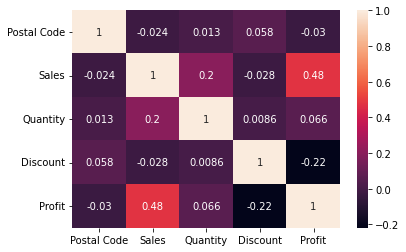

In [12]:
# Plotting a heat map using correlation matrix
sns.heatmap(correlation,annot=True)
plt.show()

#### Here we can observe that there is a positive correlation between Profit and sales i.e when sales increases profit increases.

<AxesSubplot:>

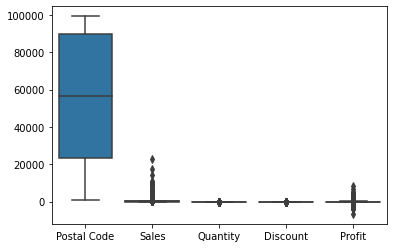

In [13]:
# We check the outliers of every feature using boxplot
sns.boxplot(data=df)

#### There are no outliers present as such.

<AxesSubplot:>

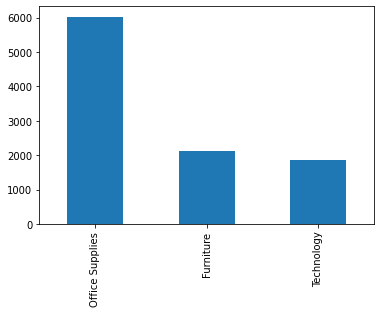

In [14]:
df['Category'].value_counts().plot(kind="bar")


#### Here it can be observed that the sale of office supplies is way higher than that of the other two categories.

<AxesSubplot:xlabel='Segment'>

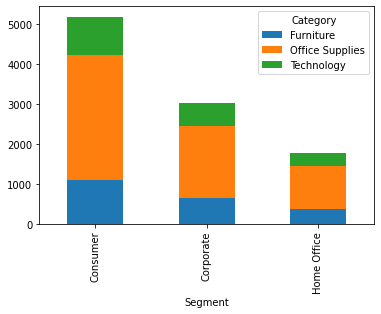

In [15]:
# To form a graph showing different categories under each segment
pd.crosstab(df['Segment'],df['Category']).plot(kind="bar",stacked=True)

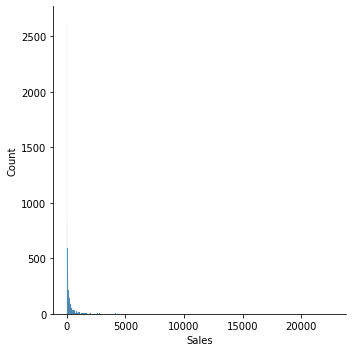

In [16]:
sns.displot(df["Sales"])

#### It can be observed that the data here is higly right skewed.

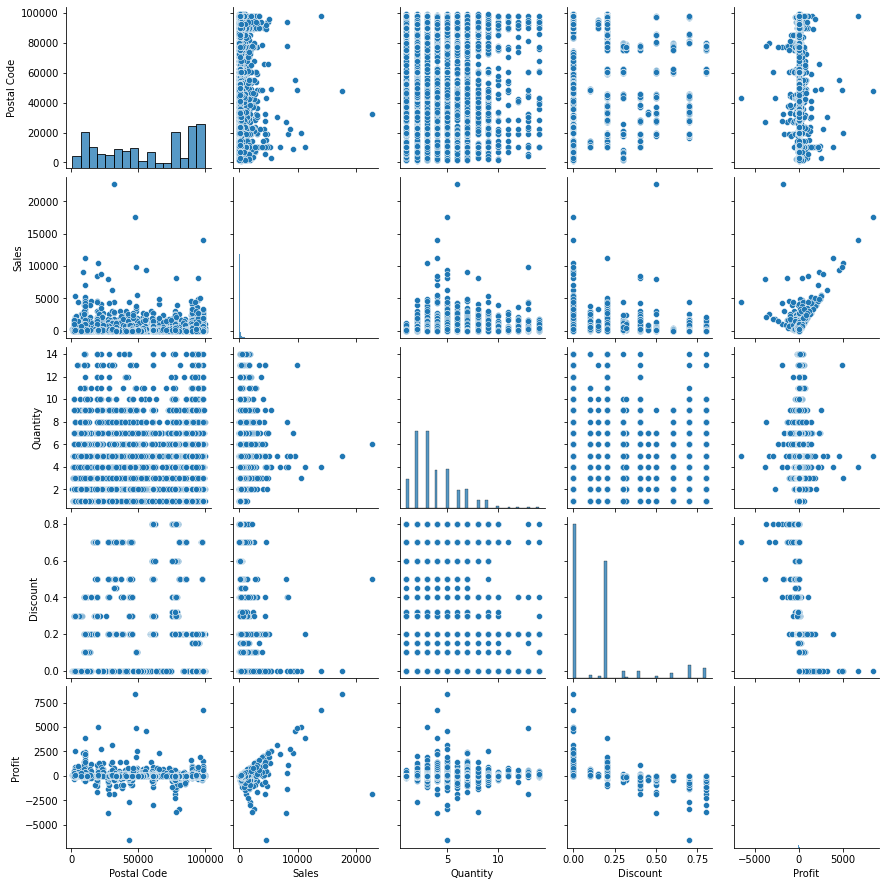

In [17]:
sns.pairplot(df)

#### 1. From the profit vs sales graph from above we can infer it is not necessary true that with the increase in sale profit increases.
#### 2. From the profit vs discount graph from above we infer that when the discount is till 0.3, there is a profit.¶
#### But if the discount increases beyond 0.3 there is a loss happening
#### 3. From the discount vs sales graph from above we can infer that after a point when discount is increasing the total sales amount is decreasing.

<AxesSubplot:>

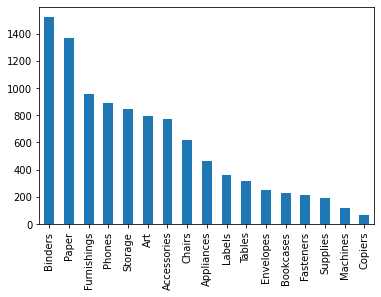

In [18]:
df['Sub-Category'].value_counts().plot(kind="bar")

#### THE SUB-CATEGORY IS ARRANGED ON THE BASIS OF MOST SELLING PRODUCTS.

<AxesSubplot:xlabel='Region'>

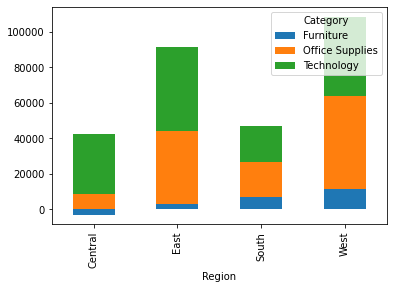

In [19]:
pd.crosstab(df["Region"],df["Category"],df["Profit"],aggfunc='sum').plot(kind="bar",stacked=True)

#### There is more profit from the East and West regions.

<AxesSubplot:xlabel='Category'>

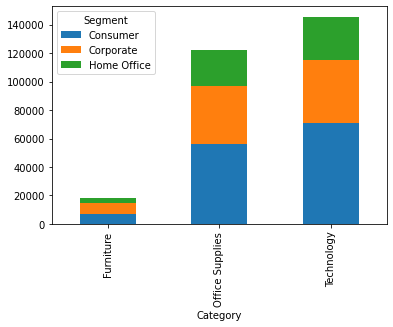

In [20]:
pd.crosstab(index=df["Category"],columns=df["Segment"],values=df["Profit"],aggfunc="sum").plot(kind="bar",stacked=True)

#### Although office supplies is the most selling category but the profit is highest from the technology sector Under Technology the purchasing ie the profit has come more from the Consumers segment.

<AxesSubplot:xlabel='Category'>

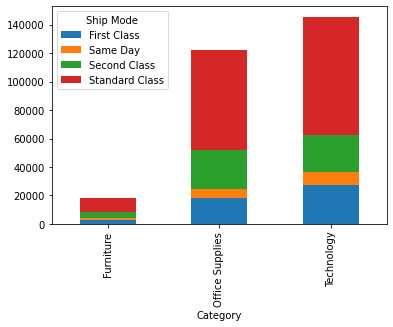

In [21]:
pd.crosstab(index=df["Category"],columns=df["Ship Mode"],values=df["Profit"],aggfunc="sum").plot(kind="bar",stacked=True)

#### The profit is high when the ship mode is "Standard Class" and the Profit is negligible when the ship Mode is "Same day".

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


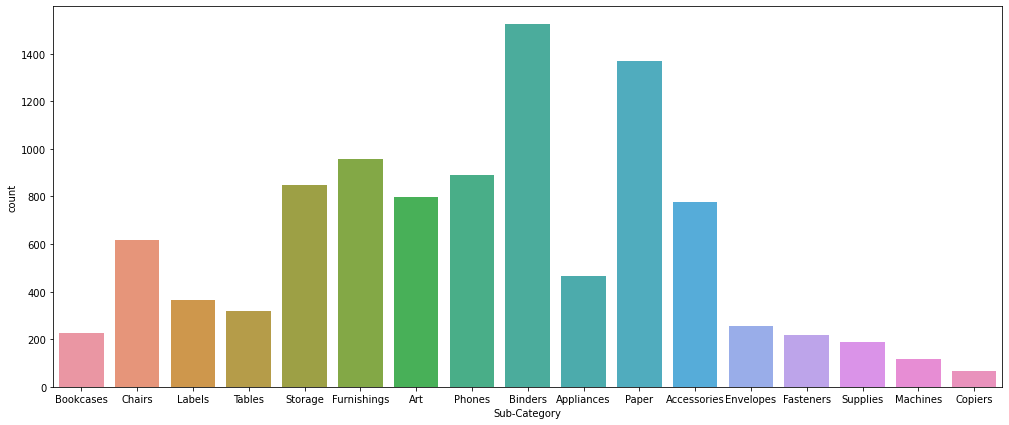

In [26]:
plt.figure(figsize=(17,7))
sns.countplot(x=df['Sub-Category'])
print(df['Sub-Category'].value_counts())

#### Highest sold sub category is Binders and lowest sold sub category is Copiers.

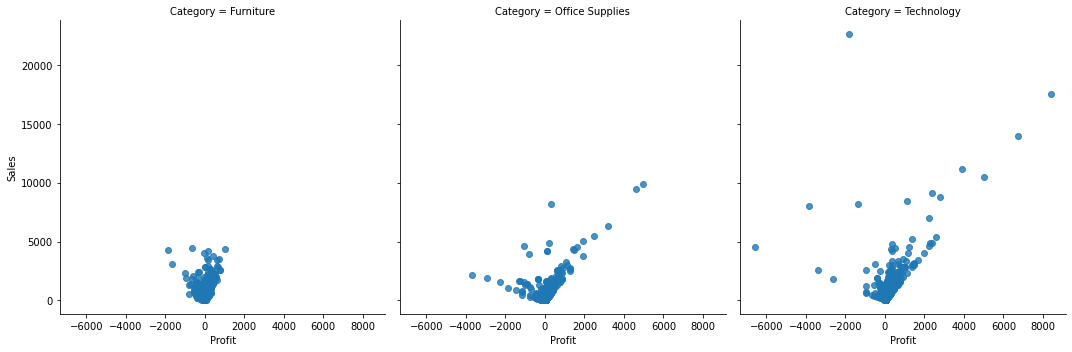

In [27]:
sns.lmplot(x="Profit",y="Sales",data=df,fit_reg=False,col="Category")
plt.show()

#### The profit is very low almost 0 in the Furniture sector also the profit is high in the Technology sector.

 0.0000      65
 6.2208      43
 9.3312      38
 5.4432      32
 3.6288      32
             ..
-3.5622       1
-7.4800       1
 626.1850     1
-12.8392      1
 6.1704       1
Name: Profit, Length: 7287, dtype: int64


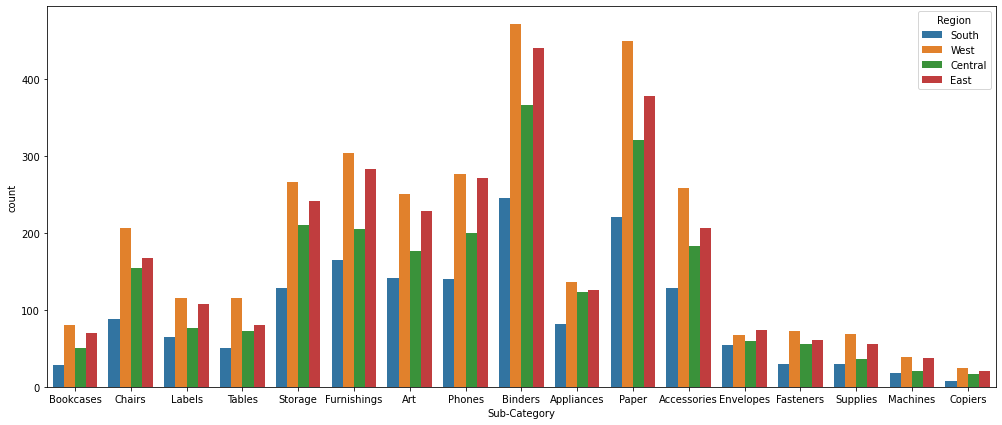

In [32]:
plt.figure(figsize=(17,7))
sns.countplot(x='Sub-Category',hue='Region',data=df)
print(df['Profit'].value_counts())

<AxesSubplot:xlabel='Sub-Category', ylabel='count'>

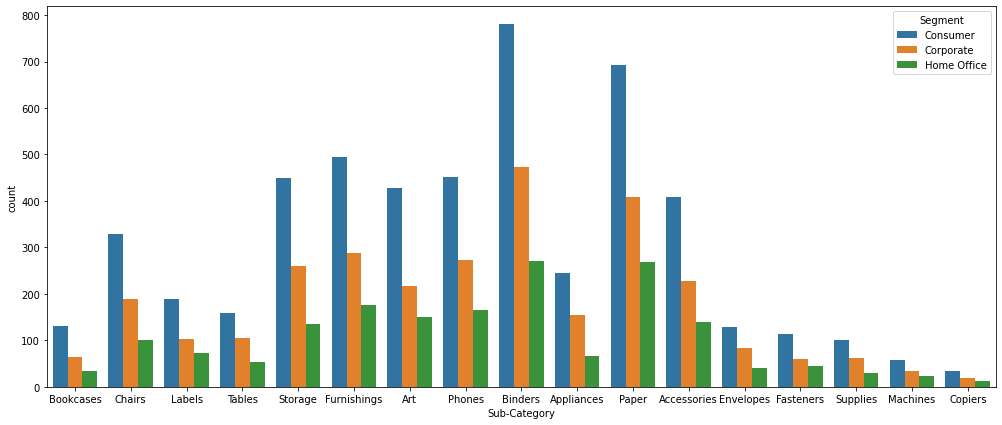

In [34]:
plt.figure(figsize=(17,7))
sns.countplot(x='Sub-Category',hue='Segment',data=df)

c:\users\sayantika\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Sub-Category', ylabel='Profit'>

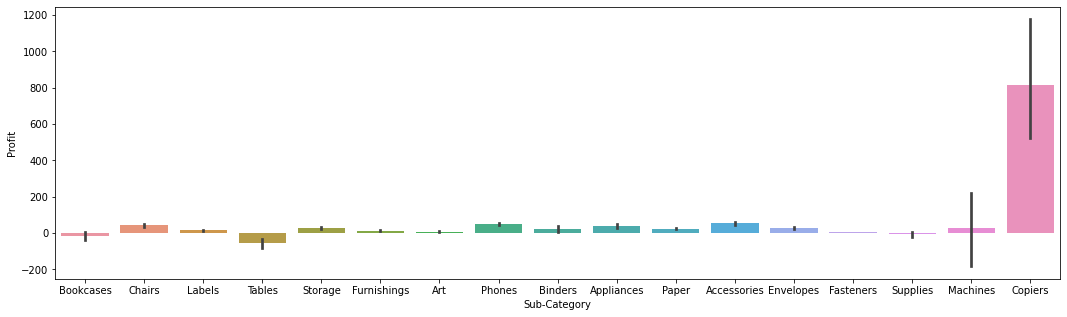

In [35]:
# Forming a combined barplot for all the sub categories with respect to profit
fig,axs=plt.subplots(1,1,figsize=(18,5))
sns.barplot("Sub-Category","Profit",data=df)

#### HERE WE OBSERVE THE PROFIT OR THE LOSSES WITH RESPECT TO EACH OF THE SUB CATEGORIES
#### We observe that Table, Bookcases and Fasteners are in loss whereas the Copiers sub category has the highest amount of profit.

In [6]:
fig=px.sunburst(df,path=['Country','Category','Sub-Category'],values='Sales',color='Category',hover_data=['Sales','Quantity','Profit'])
fig.update_layout(height=700)
fig.show()


### THE FINAL INSIGHTS
#### 1. When the discount is till 0.3 there is a profit.But if the discount increases beyond 0.3 there a loss will be incurred
#### 2. Although office supplies is the most selling category but the profit is highest from the technology sector. Under which the the profit has come more from the Consumers segment.
#### 3. Although Copiers is the least selling sub-category but has given the most profit out of all the sub-categories.
#### 4.There is a huge loss from the furniture section.
#### 5.The profit is high when the ship mode is "Standard Class" and the Profit is negligible when the ship Mode is "Same day"
#### 6.The profit is more from the east and west region of the country.
### SUGGESTIONS TO THE BUSSINESS
#### 1.THE DISCOUNT SHOULD NOT BE INCREASED BEYOND 0.3.
#### 2.THE FURNITURE CATEGORY IS CAUSING A LOT OF LOSS, SO THE COMPANY CAN STOP SELLING FURNITURES OR SHOULD INCREASE THE PRICE OF THE FURNITURE CATEGORY OR CAN TRY TO REDUCE THE OVERALL COST OF THE PRODUCT
#### 3. IF THE SHIPPING MODE IS "SAME DAY", THE SHIPPING CHARGES SHOULD BE INCREASED.
#### 4.THE COMPANY SHOULD FOCUS MORE ON THE TECHNOLOGY SECTION